In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [16]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [18]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

613

In [19]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
#Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.


Processing Record 7 of Set 4 | morehead
Processing Record 8 of Set 4 | konya
Processing Record 9 of Set 4 | cockburn town
Processing Record 10 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 4 | hofn
Processing Record 12 of Set 4 | tarudant
City not found. Skipping...
Processing Record 13 of Set 4 | srivardhan
Processing Record 14 of Set 4 | haibowan
City not found. Skipping...
Processing Record 15 of Set 4 | watsa
Processing Record 16 of Set 4 | port alfred
Processing Record 17 of Set 4 | palmer
Processing Record 18 of Set 4 | barbate
Processing Record 19 of Set 4 | cabo san lucas
Processing Record 20 of Set 4 | avarua
Processing Record 21 of Set 4 | lata
Processing Record 22 of Set 4 | bambous virieux
Processing Record 23 of Set 4 | deputatskiy
Processing Record 24 of Set 4 | lagoa
Processing Record 25 of Set 4 | marawi
Processing Record 26 of Set 4 | jardim
Processing Record 27 of Set 4 | verkh-suetka
Processing Record 28 of Set 4 | tautira
Processin

In [20]:
len(city_data)

566

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Morondava,-20.2833,44.2833,66.24,86,6,7.43,MG,2021-06-06 02:57:17
1,Kapaa,22.0752,-159.3190,84.18,71,11,1.99,US,2021-06-06 02:57:23
2,Nikolskoye,59.7035,30.7861,55.29,69,100,3.00,RU,2021-06-06 02:57:23
3,Atuona,-9.8000,-139.0333,79.34,69,18,14.18,PF,2021-06-06 02:57:24
4,Butaritari,3.0707,172.7902,82.53,74,35,7.14,KI,2021-06-06 02:57:24
5,Chokurdakh,70.6333,147.9167,37.06,80,100,18.50,RU,2021-06-06 02:57:24
6,Hermanus,-34.4187,19.2345,61.90,41,8,8.72,ZA,2021-06-06 02:57:24
7,Ushuaia,-54.8000,-68.3000,31.66,86,0,8.05,AR,2021-06-06 02:57:25
8,Bluff,-46.6000,168.3333,49.80,70,78,4.74,NZ,2021-06-06 02:57:25
9,Albany,42.6001,-73.9662,73.45,70,24,7.11,US,2021-06-06 02:57:25


In [22]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Morondava,MG,2021-06-06 02:57:17,-20.2833,44.2833,66.24,86,6,7.43
1,Kapaa,US,2021-06-06 02:57:23,22.0752,-159.3190,84.18,71,11,1.99
2,Nikolskoye,RU,2021-06-06 02:57:23,59.7035,30.7861,55.29,69,100,3.00
3,Atuona,PF,2021-06-06 02:57:24,-9.8000,-139.0333,79.34,69,18,14.18
4,Butaritari,KI,2021-06-06 02:57:24,3.0707,172.7902,82.53,74,35,7.14
5,Chokurdakh,RU,2021-06-06 02:57:24,70.6333,147.9167,37.06,80,100,18.50
6,Hermanus,ZA,2021-06-06 02:57:24,-34.4187,19.2345,61.90,41,8,8.72
7,Ushuaia,AR,2021-06-06 02:57:25,-54.8000,-68.3000,31.66,86,0,8.05
8,Bluff,NZ,2021-06-06 02:57:25,-46.6000,168.3333,49.80,70,78,4.74
9,Albany,US,2021-06-06 02:57:25,42.6001,-73.9662,73.45,70,24,7.11


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

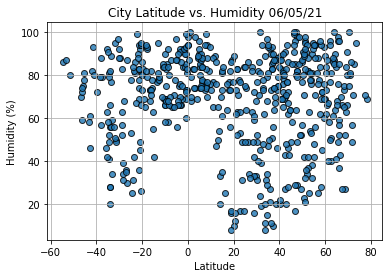

In [26]:
# Import time module
import time

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

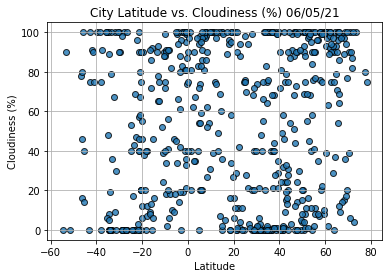

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

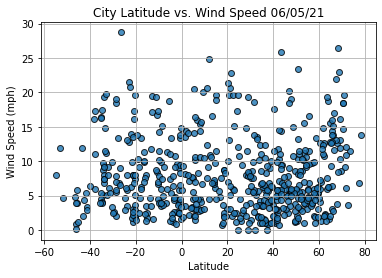

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()